# Trabajo Práctico N°2 
Asignatura: Minería de Datos.

Carrera: Tecnicatura Universitaria en Inteligencia Artificial.

Año: 2024.

Integrantes:
- López Ceratto, Julieta: L - 3311/1.
- Rodríguez Griñó, Tomás: R - 4643/4

# Librerías.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carga de datos

In [55]:
clima = pd.read_csv('data\dxWeather.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\totor\AppData\Local\Temp\ipykernel_17644\4108635195.py:1: SyntaxWarning: invalid escape sequence '\d'
  clima = pd.read_csv('data\dxWeather.csv')


# Análisis dataset.

Primero analizamos si hay datos faltantes en los 2 datasets

In [56]:
clima

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica,Localizacion,TipoClima,Estacion
0,39,96,8.5,71,1011.43,Llanura,Nublado,Primavera
1,30,64,7.0,16,1018.72,Montania,Soleado,Primavera
2,38,83,1.5,82,1026.25,Costa,Soleado,Primavera
3,32,55,3.5,26,1010.03,Llanura,Nublado,Verano
4,3,85,6.0,96,984.46,Llanura,Nevado,Invierno
...,...,...,...,...,...,...,...,...
10085,31,24,8.0,5,1029.61,Llanura,Soleado,Verano
10086,29,62,13.0,17,1002.81,Costa,Nublado,Primavera
10087,10,74,14.5,71,1003.15,Montania,Lluvioso,Verano
10088,30,77,5.5,28,1012.69,Costa,Nublado,Otonio


In [57]:
clima.isna().any().any()

np.False_

Revisamos los tipos de datos que poseemos

In [58]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


Luego, vemos y analizamos las distribuciones de los datos numericos del dataset

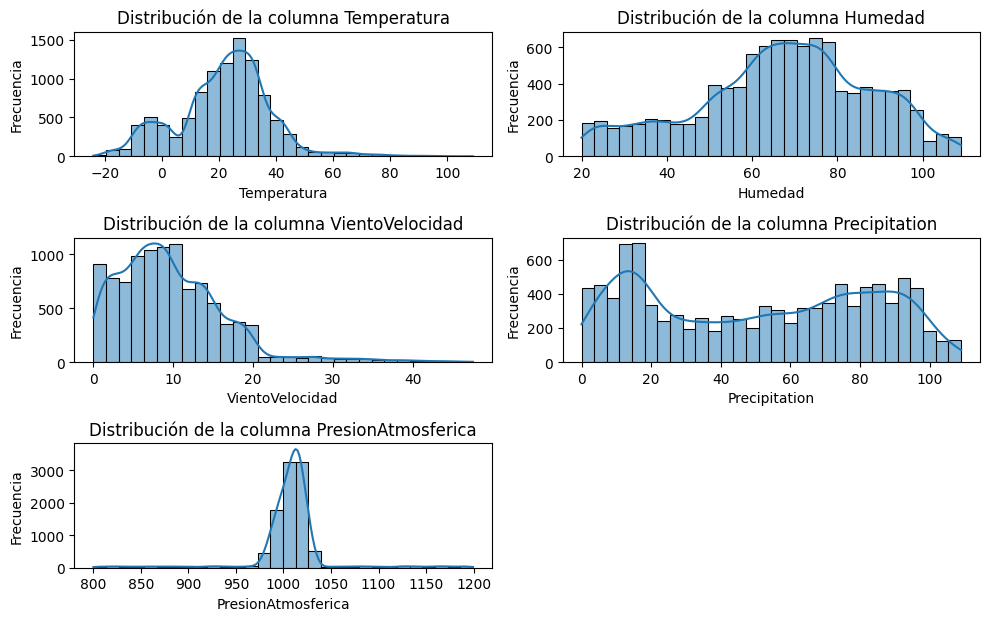

In [62]:
numerical_cols = clima.select_dtypes(include=['float64', 'int64']).columns


n_cols = 2  
n_rows = 5 

plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear subgráfica
    sns.histplot(clima[col], bins=30, kde=True)
    plt.title(f"Distribución de la columna {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")


plt.tight_layout()  
plt.show()

### 1. Temperatura
* La distribución de la temperatura parece estar centrada entre aproximadamente 0 y 20 grados, con una ligera asimetría hacia la izquierda (valores negativos).
* La curva KDE (estimación de densidad de núcleo) sugiere que la mayoría de los valores se encuentran entre 0 y 30 grados, con algunos valores extremos hacia el lado negativo, indicando temperaturas bajas, pero estos son menos frecuentes.
* Podría haber valores extremos en la cola izquierda, lo que indica posibles eventos de frío extremo.
### 2. Humedad
* La distribución de la humedad es más bien uniforme, sin un pico muy definido.
* Se observa que la mayor parte de los valores se concentran entre el 60% y el 100%, con algunas fluctuaciones, pero en general, se observa una tendencia de alta humedad.
* Este tipo de distribución puede ser normal en regiones donde la humedad tiende a ser alta durante la mayor parte del tiempo, y sería interesante ver si esto varía estacionalmente.
### 3. Viento Velocidad
* La distribución de la velocidad del viento es asimétrica hacia la derecha, con un pico alrededor de 10 unidades.
* Esto sugiere que la mayoría de las observaciones registran velocidades bajas a moderadas del viento, mientras que las velocidades más altas (más de 30) son poco frecuentes.
* Esta distribución puede indicar que es un área con vientos principalmente moderados, aunque también se presentan algunos eventos de viento fuerte.
### 4. Precipitación
* La precipitación muestra una distribución bastante dispersa, con varios picos.
* La mayoría de los valores están alrededor de 0-20 y luego se extienden con más picos entre 40 y 80, lo que indica una variabilidad en la cantidad de precipitación.
* Esto puede reflejar días con poca lluvia combinados con eventos de lluvias intensas ocasionales. Una inspección adicional por estacionalidad o clima específico podría ayudar a entender mejor esta variabilidad.
### 5. Presión Atmosférica
* La presión atmosférica presenta una distribución muy concentrada alrededor de los 1000 hPa, con una ligera variación.
* Esto es típico, ya que la presión atmosférica no suele fluctuar mucho en condiciones normales, pero pequeñas desviaciones pueden indicar eventos meteorológicos específicos.
* La forma de campana (similar a una distribución normal) sugiere que no hay muchos valores atípicos y que la presión tiende a mantenerse bastante estable en este rango.

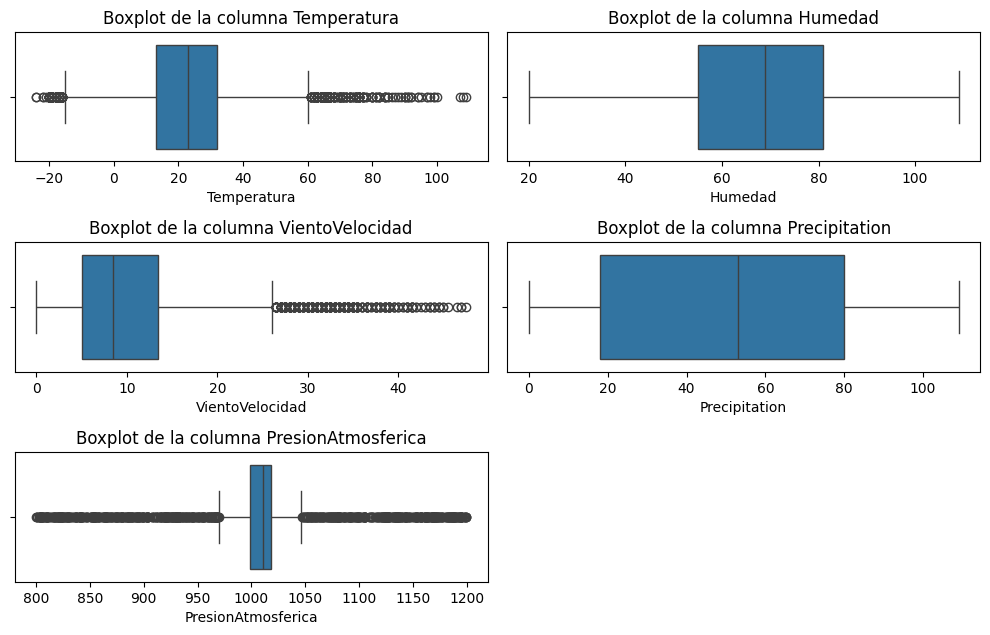

In [63]:
numerical_cols = clima.select_dtypes(include=['float64', 'int64']).columns


n_cols = 2  
n_rows = 5 

plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1 + n_cols)  # Crear boxplot en la siguiente subgráfica
    sns.boxplot(data=clima, x=col)
    plt.title(f"Boxplot de la columna {col}")
    plt.xlabel(col)


plt.tight_layout()  
plt.show()

### 1. Temperatura
* El boxplot muestra que la mayor parte de los valores de temperatura se encuentra entre 0 y 30 grados, lo que coincide con la concentración observada en el histograma anterior.
* Existen varios valores atípicos en el rango superior, alcanzando valores superiores a 80 grados, que parecen ser inusuales y posiblemente anomalías en los datos o eventos extremos.
* También hay valores atípicos en el extremo inferior, con algunas temperaturas menores a -20 grados.
### 2. Humedad
* La humedad tiene una distribución más equilibrada, sin valores atípicos evidentes en los extremos.
* La mayoría de los datos están concentrados entre 60% y 100%, lo cual indica una humedad generalmente alta en los registros.
* La mediana está cerca de 80%, lo que significa que en la mayoría de los casos, los valores de humedad son elevados.
### 3. Viento Velocidad
* La velocidad del viento presenta valores atípicos en el rango superior, con varias observaciones por encima de 20 unidades.
* La mayoría de los valores se concentran por debajo de 15, lo cual indica que los vientos fuertes son poco frecuentes en comparación con vientos de menor velocidad.
* Los outliers en la parte superior sugieren la presencia de algunos eventos de viento muy fuerte, que pueden ser raros o extremos.
### 4. Precipitación
* El boxplot de precipitación muestra una gran dispersión de los datos, sin valores atípicos visibles, lo que indica una variabilidad natural en las cantidades de precipitación.
* La mediana se encuentra cerca del centro del rango, y los datos están distribuidos entre 0 y aproximadamente 100, lo cual refleja tanto días sin lluvia como eventos de precipitación intensa.
* Esta variabilidad sugiere que el dataset cubre tanto eventos de lluvia ligera como fuertes precipitaciones.
### 5. Presión Atmosférica
* La presión atmosférica tiene un rango muy estrecho, con una gran cantidad de valores atípicos en ambos extremos.
* La mayoría de los datos se encuentran alrededor de los 1000 hPa, lo cual es típico para la presión atmosférica en condiciones normales.
* Los outliers en ambos extremos reflejan pequeñas desviaciones de la presión atmosférica estándar, que pueden estar asociadas con cambios meteorológicos o variaciones locales.

# Punto 1: Kernel Lineal.

**Juli**

Realizar la predicción del atributo Estación utilizando máquinas de vectores con kernel lineal analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k = 5.

# Punto 2: Kernel Gaussiano.

**Toto**

Realizar la predicción del atributo Estación utilizando máquinas de vectores con kernel gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k = 5.

# Punto 3: Random Forest.

**Juli**

Realizar la predicción del atributo Estación utilizando Random Forest analizando los parámetros cantidad de estimadores y la máxima profundidad de los  rboles. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k = 5.